In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
%matplotlib inline
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

In [137]:
df=pd.read_csv('datasets/loan_data.csv')
df_copy = df.copy()

In [138]:
df_copy.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [139]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [140]:
df_copy.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [141]:
# check duplication in ID
sum(df_copy['Loan_ID'].duplicated())

0

------------------------------------------------------------------------------------------------------------------

### Check Missing Values 

In [142]:
df_copy.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- [Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History]

In [143]:
df_copy['Gender'].value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

In [144]:
df_copy[df_copy['Gender'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [145]:
df_copy['Married'].value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

In [146]:
df_copy[df_copy['Married'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [147]:
df_copy['Dependents'].value_counts(dropna=False)

0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64

In [148]:
df_copy[df_copy['Dependents'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [149]:
df_copy['Self_Employed'].value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

In [150]:
df_copy[df_copy['Self_Employed'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
107,LP001370,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
111,LP001387,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
114,LP001398,Male,No,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y
158,LP001546,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y


In [151]:
df_copy['Credit_History'].value_counts(dropna=False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

In [152]:
df_copy[df_copy['Credit_History'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
42,LP001123,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y
79,LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
83,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,N
86,LP001280,Male,Yes,2,Not Graduate,No,3333,2000.0,99.0,360.0,NaN,Semiurban,Y
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
117,LP001405,Male,Yes,1,Graduate,No,2214,1398.0,85.0,360.0,NaN,Urban,Y
125,LP001443,Female,No,0,Graduate,No,3692,0.0,93.0,360.0,NaN,Rural,Y


### Handling Missing Values
- Gategorical columns [Gender, Married, Dependents, Self_Employed]
    - Replace nan values in categorical columns with "Mode"
- Numeric columns [LoanAmount, Loan_Amount_Term, Credit_History]
    - [LoanAmount, Loan_Amount_Term] replace nan values in numeric columns with "Mean"
    - [Credit_History] replace with "Mode" as contains only zeros and ones

In [153]:
df_copy['Gender'].fillna(df_copy['Gender'].mode()[0], inplace=True)
df_copy['Gender'].value_counts(dropna=False)

Male      502
Female    112
Name: Gender, dtype: int64

In [154]:
df_copy['Married'].fillna(df_copy['Married'].mode()[0], inplace=True)
df_copy['Married'].value_counts(dropna=False)

Yes    401
No     213
Name: Married, dtype: int64

In [155]:
df_copy['Dependents'].fillna(df_copy['Dependents'].mode()[0], inplace=True)
df_copy['Dependents'].value_counts(dropna=False)

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [156]:
df_copy['Self_Employed'].fillna(df_copy['Self_Employed'].mode()[0], inplace=True)
df_copy['Self_Employed'].value_counts(dropna=False)

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [157]:
df_copy['LoanAmount'].fillna(df_copy['LoanAmount'].mean(), inplace=True)
df_copy['LoanAmount'].value_counts(dropna=False)

146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
211.000000     1
250.000000     1
62.000000      1
85.000000      1
436.000000     1
Name: LoanAmount, Length: 204, dtype: int64

In [158]:
df_copy['Loan_Amount_Term'].fillna(df_copy['Loan_Amount_Term'].mean(), inplace=True)
df_copy['Loan_Amount_Term'].value_counts(dropna=False)

360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [159]:
df_copy['Credit_History'].fillna(df_copy['Credit_History'].mode()[0], inplace=True)
df_copy['Credit_History'].value_counts(dropna=False)

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [160]:
#== check all missing values after fillna ==
df_copy.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

---------------------------------------------------------------------------------------------------------------

### Check Ouliers Values 

In [161]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [162]:
# Outliers
Q1 = df_copy['ApplicantIncome'].quantile(0.25)
Q3 = df_copy['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

df_ApplicantIncome = df_copy[(df_copy['ApplicantIncome'] < (Q1 - 1.5 * IQR)) | (df_copy['ApplicantIncome'] > (Q3 + 1.5 * IQR))]

print('Count of "ApplicantIncome" outliers:- ', df_ApplicantIncome.count()['Loan_ID'])

Count of "ApplicantIncome" outliers:-  50


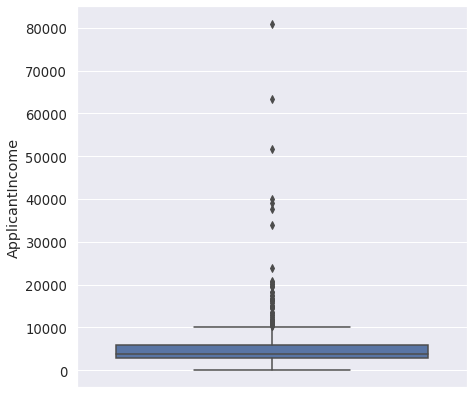

In [163]:
sns.boxplot(y=df_copy["ApplicantIncome"]);
plt.show()

In [164]:
# Outliers
Q1 = df_copy['CoapplicantIncome'].quantile(0.25)
Q3 = df_copy['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

df_CoapplicantIncome = df_copy[(df_copy['CoapplicantIncome'] < (Q1 - 1.5 * IQR)) | (df_copy['CoapplicantIncome'] > (Q3 + 1.5 * IQR))]

print('Count of "CoapplicantIncome" outliers:- ', df_CoapplicantIncome.count()['Loan_ID'])

Count of "CoapplicantIncome" outliers:-  18


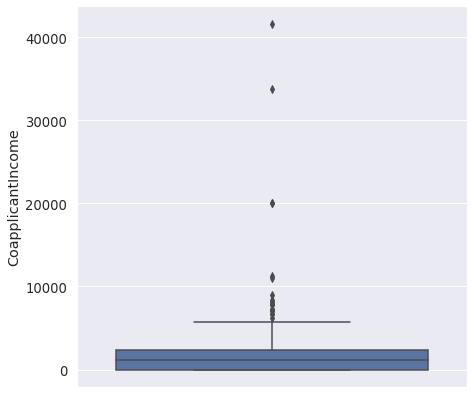

In [165]:
sns.boxplot(y=df_copy["CoapplicantIncome"]);
plt.show()

In [166]:
# Outliers
Q1 = df_copy['LoanAmount'].quantile(0.25)
Q3 = df_copy['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1

df_LoanAmount = df_copy[(df_copy['LoanAmount'] < (Q1 - 1.5 * IQR)) | (df_copy['LoanAmount'] > (Q3 + 1.5 * IQR))]

print('Count of "LoanAmount" outliers:- ', df_LoanAmount.count()['Loan_ID'])

Count of "LoanAmount" outliers:-  41


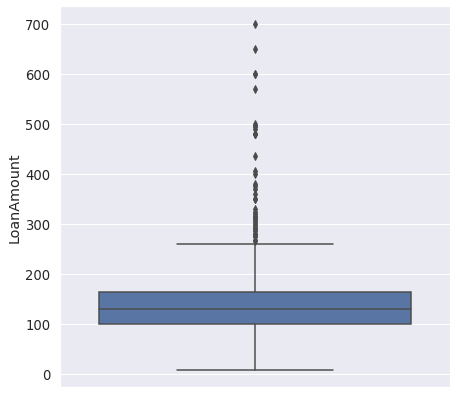

In [167]:
sns.boxplot(y=df_copy["LoanAmount"]);
plt.show()

In [168]:
frames = [df_ApplicantIncome, df_CoapplicantIncome, df_LoanAmount]
df_out = pd.concat(frames)
df_out

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N
34,LP001100,Male,No,3+,Graduate,No,12500,3000.0,320.000000,360.0,1.0,Rural,N
54,LP001186,Female,Yes,1,Graduate,Yes,11500,0.0,286.000000,360.0,0.0,Urban,N
67,LP001233,Male,Yes,1,Graduate,No,10750,0.0,312.000000,360.0,1.0,Urban,Y
102,LP001350,Male,Yes,0,Graduate,No,13650,0.0,146.412162,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,LP002813,Female,Yes,1,Graduate,Yes,19484,0.0,600.000000,360.0,1.0,Semiurban,Y
572,LP002855,Male,Yes,2,Graduate,No,16666,0.0,275.000000,360.0,1.0,Urban,Y
592,LP002933,Male,No,3+,Graduate,Yes,9357,0.0,292.000000,360.0,1.0,Semiurban,Y
600,LP002949,Female,No,3+,Graduate,No,416,41667.0,350.000000,180.0,1.0,Urban,N


---------------------------------------------------------------------------------------------------------------

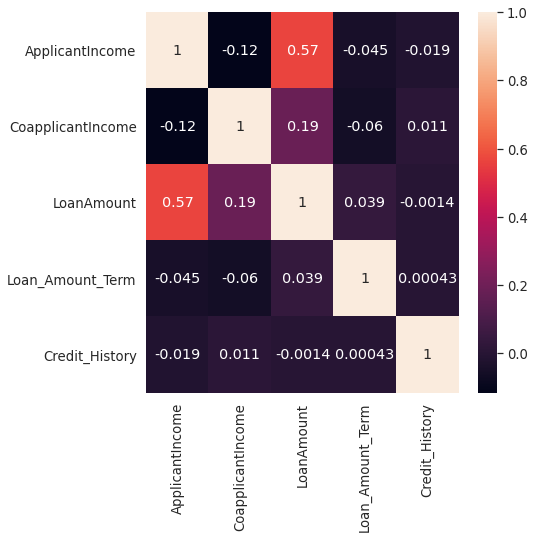

In [169]:
# Correlation 
corr = df_copy[['ApplicantIncome' ,'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']].corr()
ax1 = sns.heatmap(corr, annot=True)
plt.show()

- 0.57 correlation between LoanAmount & ApplicationIncome

---------------------------------------------------------------------------------------------------------------

### Adding "TotalApplicantIncome" include sum of (ApplicantIncome, CoapplicantIncome) 

In [170]:
df_copy['TotalApplicantIncome']= df_copy['ApplicantIncome']+df_copy['CoapplicantIncome']

In [171]:
df_copy['TotalApplicantIncome'].head()

0    5849.0
1    6091.0
2    3000.0
3    4941.0
4    6000.0
Name: TotalApplicantIncome, dtype: float64

### Univariate Analysis
##### Numeric Features

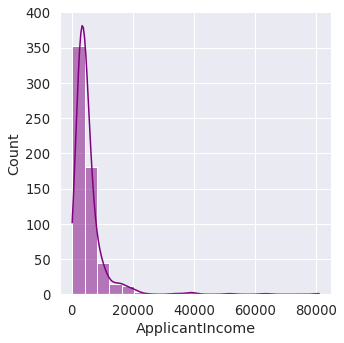

In [172]:
sns.displot(df_copy['ApplicantIncome'], color='purple', kde=True, bins=20);

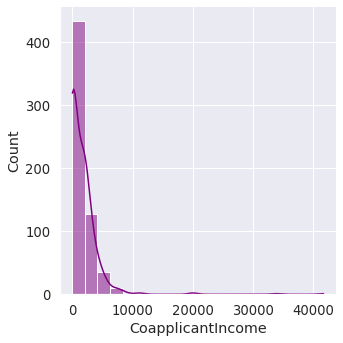

In [173]:
sns.displot(df_copy['CoapplicantIncome'], color='purple', kde=True, bins=20);

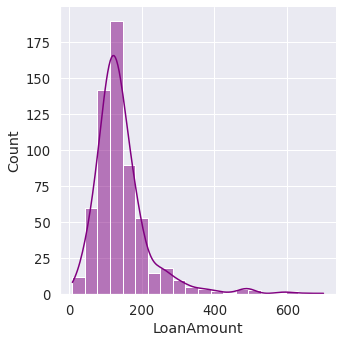

In [174]:
sns.displot(df_copy['LoanAmount'], color='purple', kde=True, bins=20);

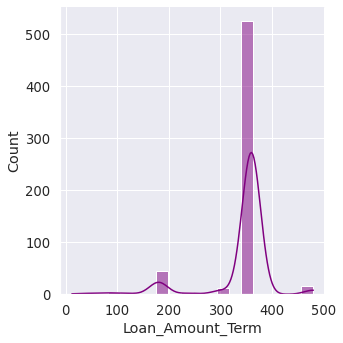

In [175]:
sns.displot(df_copy['Loan_Amount_Term'], color='purple', kde=True, bins=20);

### Bivariate Analysis
##### Numeric Features

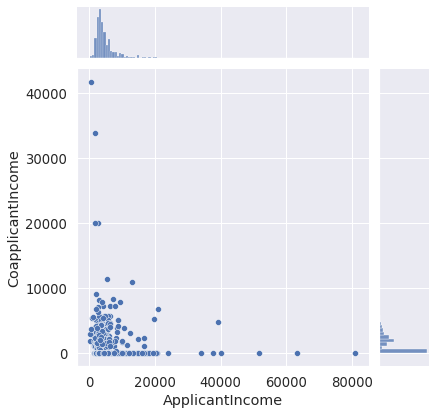

In [176]:
sns.jointplot(x='ApplicantIncome', y='CoapplicantIncome', data=df_copy, kind='scatter');

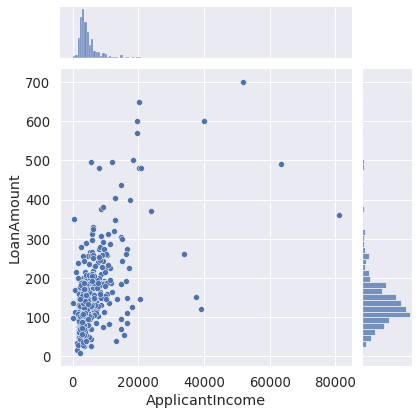

In [177]:
sns.jointplot(x='ApplicantIncome', y='LoanAmount', data=df_copy, kind='scatter');

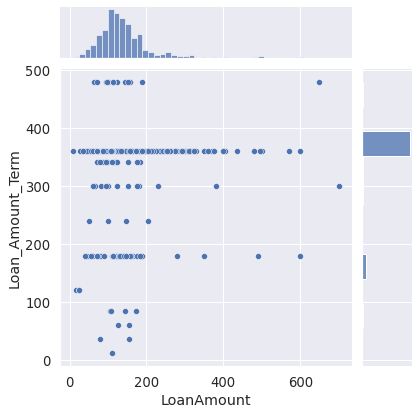

In [178]:
sns.jointplot(x='LoanAmount', y='Loan_Amount_Term', data=df_copy, kind='scatter');

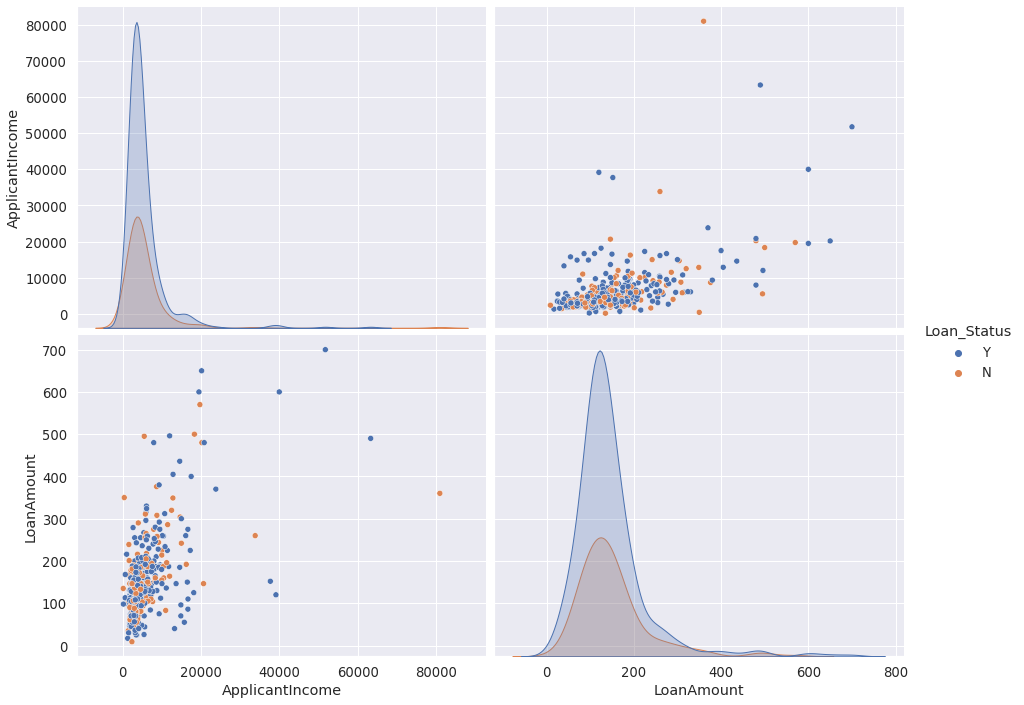

In [179]:
sns.pairplot(df_copy, vars=['ApplicantIncome','LoanAmount'], hue='Loan_Status', aspect=1.3, height=5);

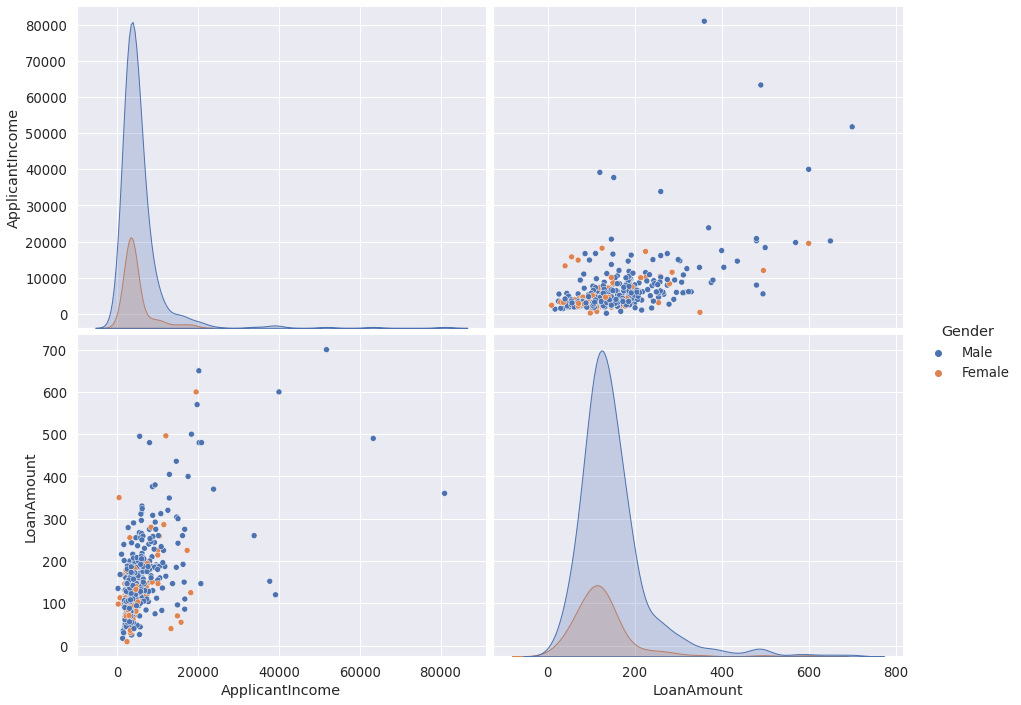

In [180]:
sns.pairplot(df_copy, vars=['ApplicantIncome','LoanAmount'], hue='Gender', aspect=1.3, height=5);

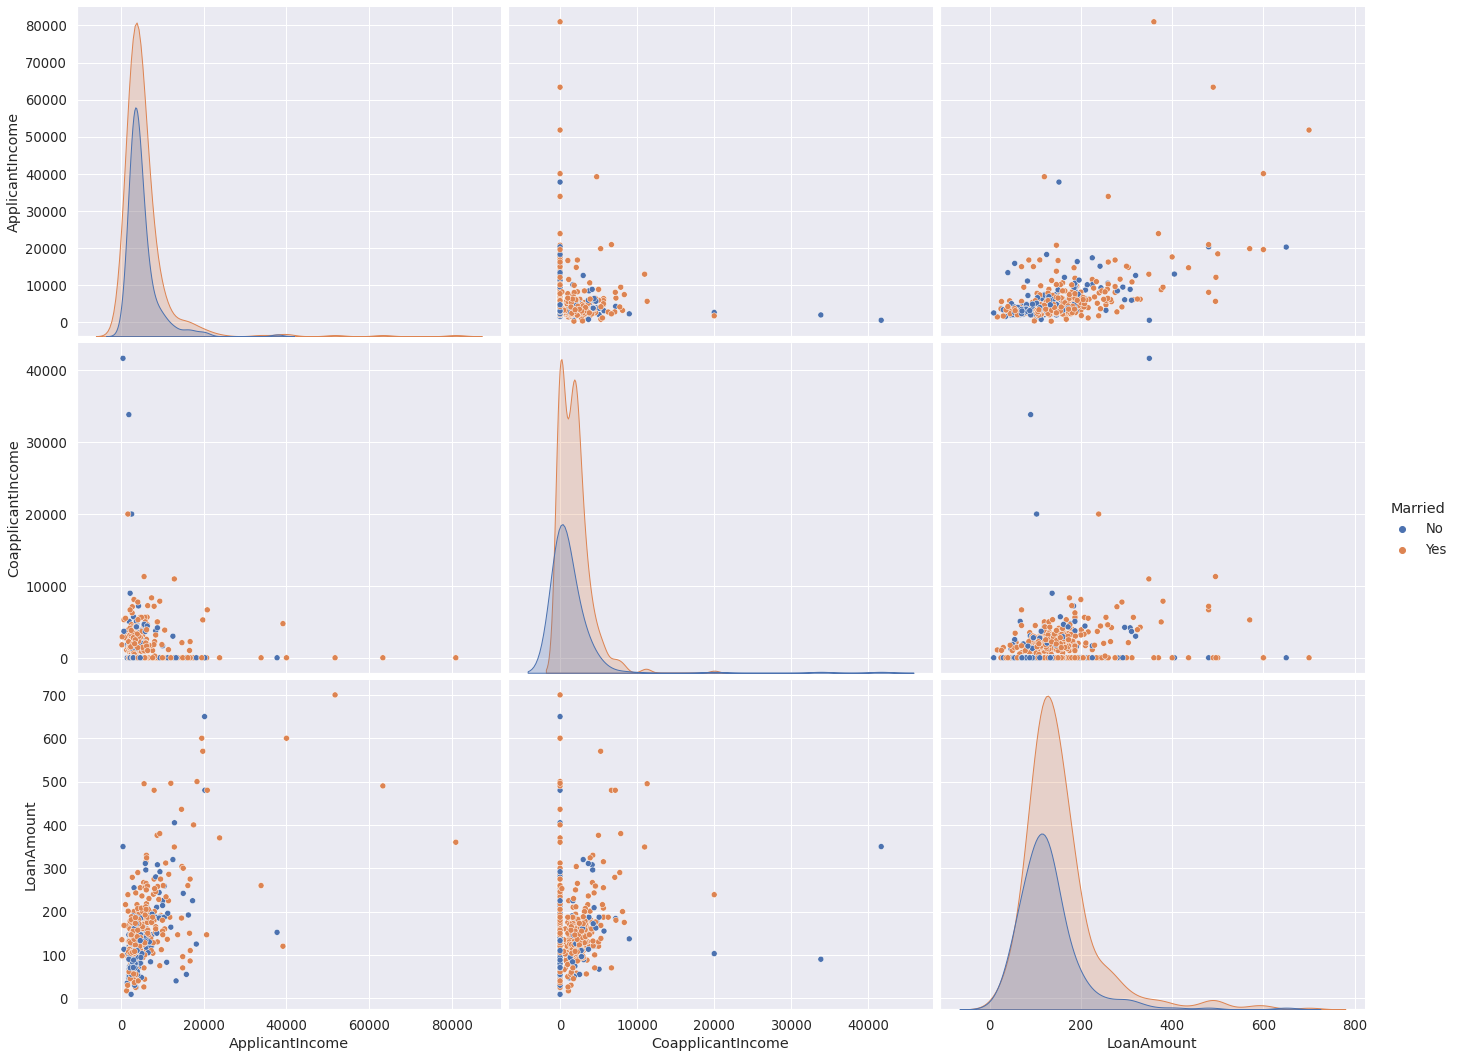

In [181]:
sns.pairplot(df_copy, vars=['ApplicantIncome','CoapplicantIncome','LoanAmount'], hue='Married', aspect=1.3, height=5);

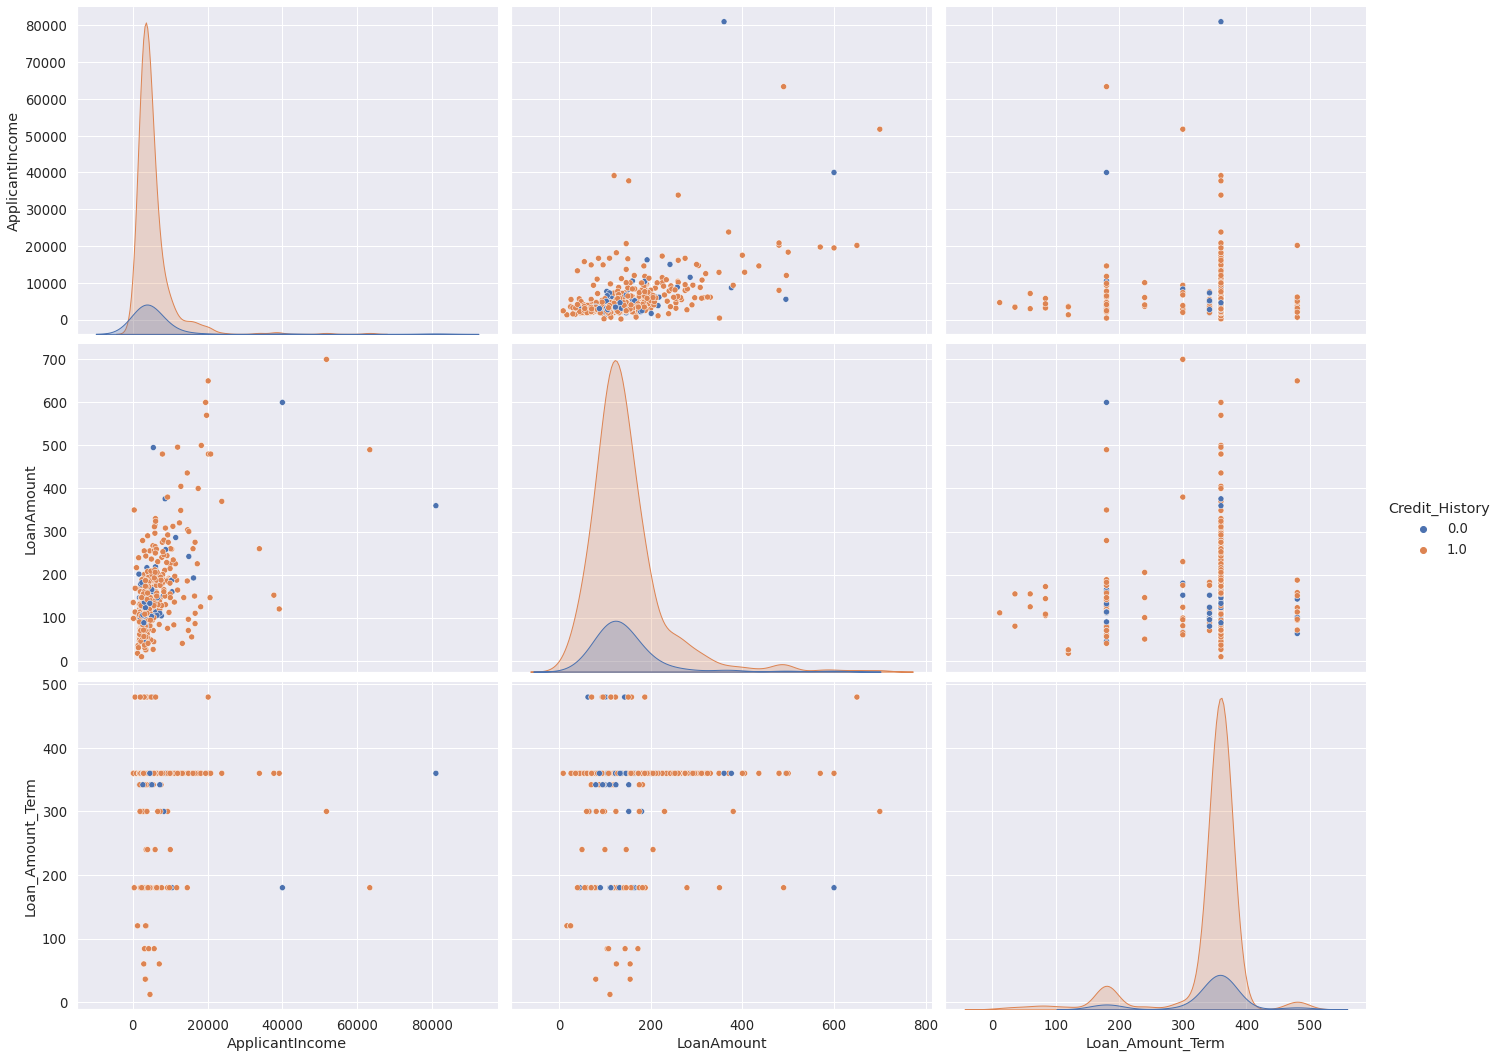

In [182]:
sns.pairplot(df_copy, vars=['ApplicantIncome','LoanAmount','Loan_Amount_Term'], hue='Credit_History', aspect=1.3, height=5);

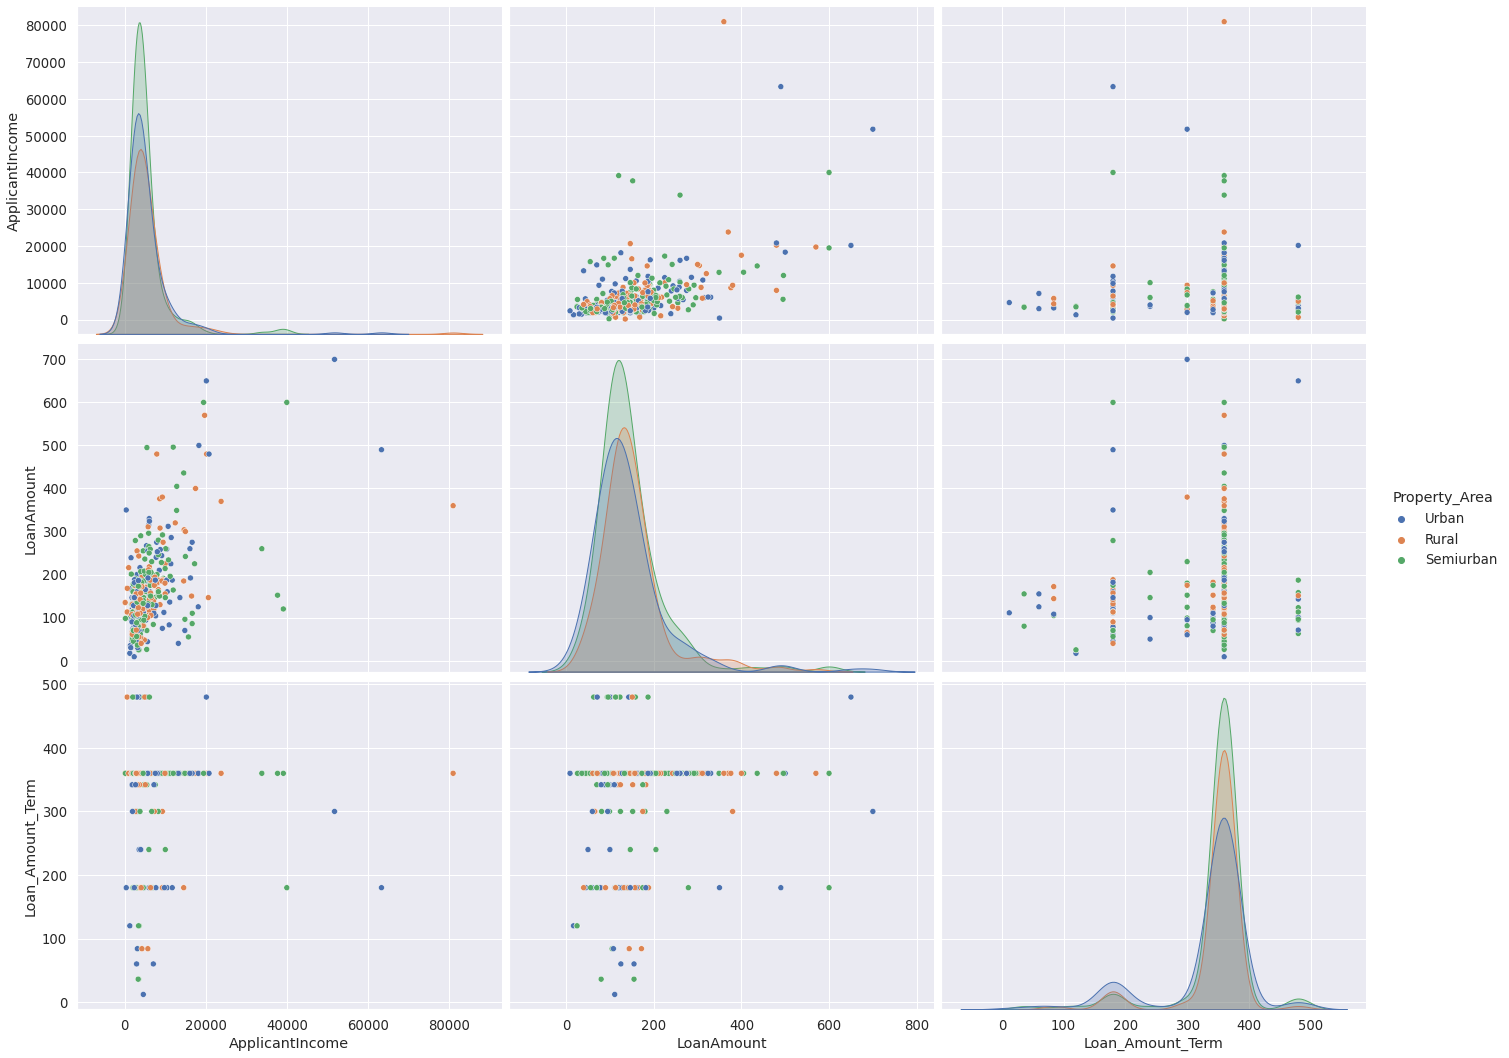

In [183]:
sns.pairplot(df_copy, vars=['ApplicantIncome','LoanAmount','Loan_Amount_Term'], hue='Property_Area', aspect=1.3, height=5);

### Univariate Analysis
##### Categorical Features

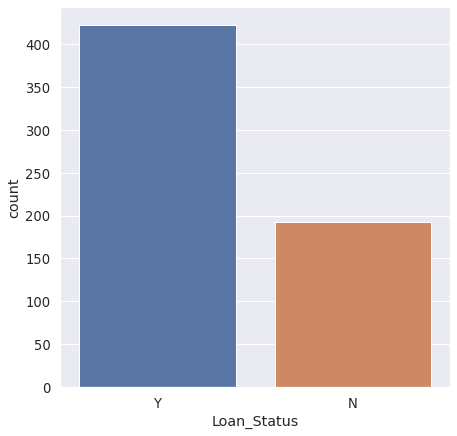

In [184]:
sns.countplot(x='Loan_Status', data=df_copy);

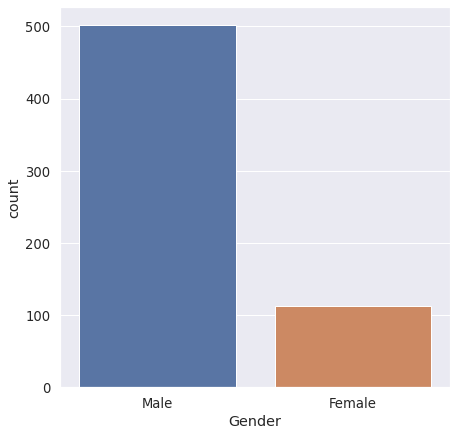

In [185]:
sns.countplot(x='Gender', data=df_copy);

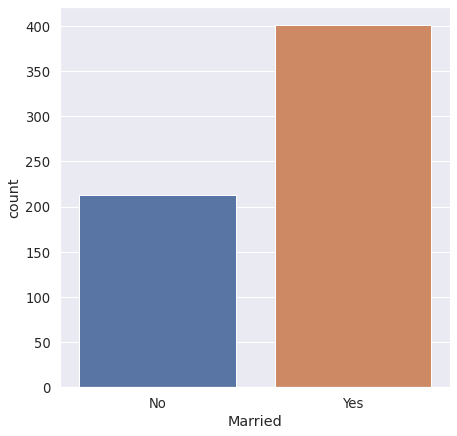

In [186]:
sns.countplot(x='Married', data=df_copy);

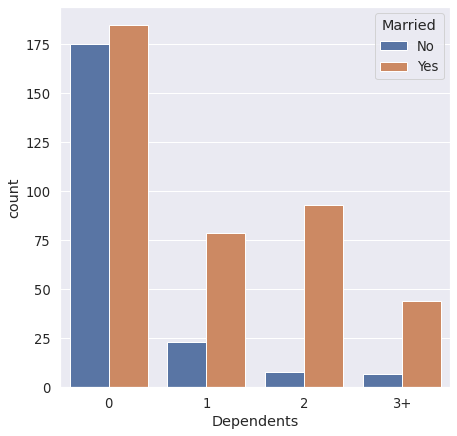

In [187]:
sns.countplot(x='Dependents', data=df_copy, hue='Married');

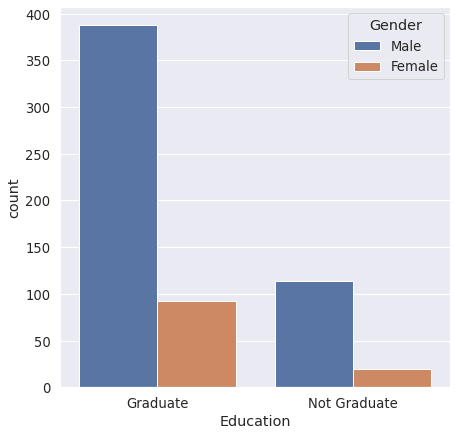

In [188]:
sns.countplot(x='Education', data=df_copy, hue='Gender');

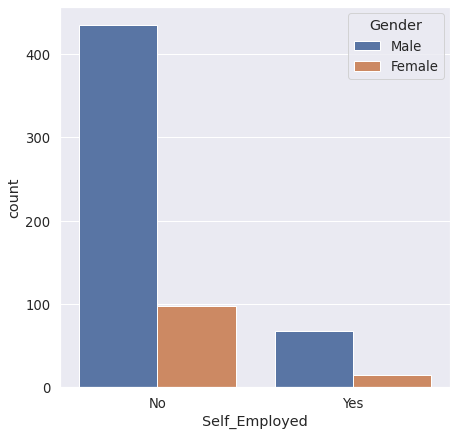

In [189]:
sns.countplot(x='Self_Employed', data=df_copy, hue='Gender');

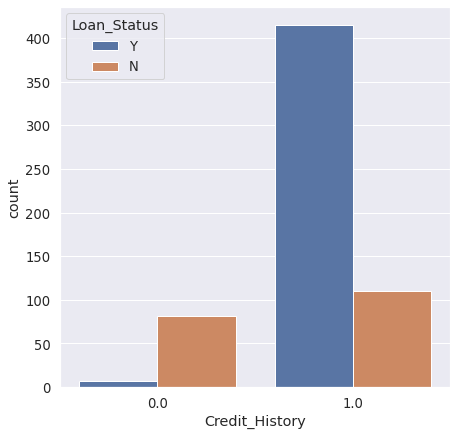

In [190]:
sns.countplot(x='Credit_History', data=df_copy, hue='Loan_Status');

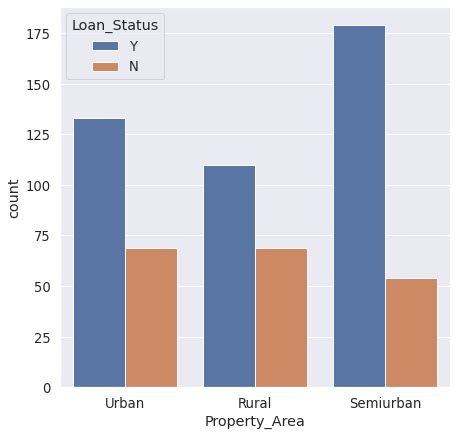

In [191]:
sns.countplot(x='Property_Area', data=df_copy, hue='Loan_Status');

### Bivariate Analysis
##### Categorical Features

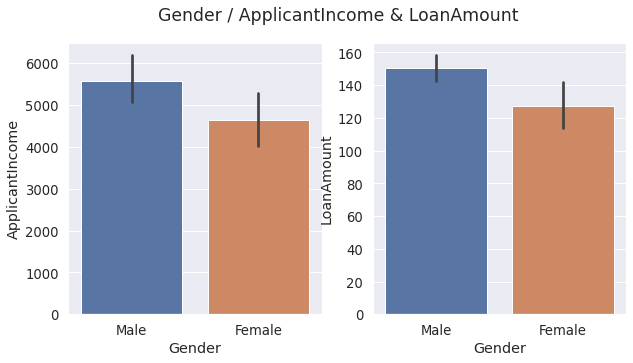

In [192]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5)) 
fig.suptitle('Gender / ApplicantIncome & LoanAmount') 
sns.barplot(ax=axes[0], data=df_copy, x='Gender', y='ApplicantIncome')
sns.barplot(ax=axes[1], data=df_copy, x='Gender', y='LoanAmount');

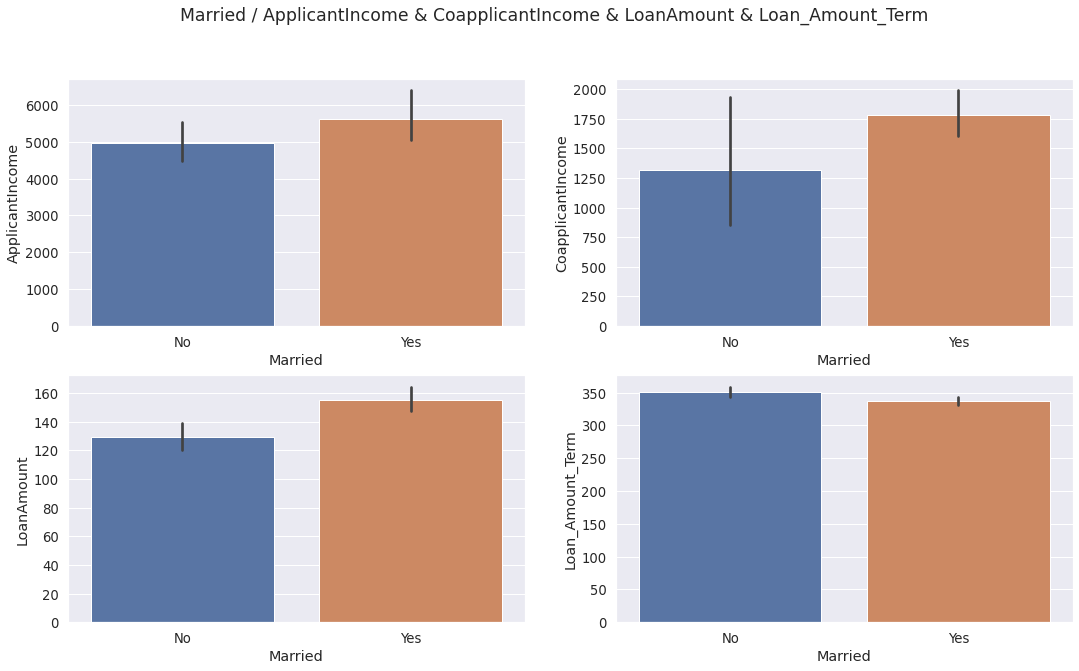

In [193]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10)) 
fig.suptitle('Married / ApplicantIncome & CoapplicantIncome & LoanAmount & Loan_Amount_Term') 
sns.barplot(ax=axes[0, 0], data=df_copy, x='Married', y='ApplicantIncome')
sns.barplot(ax=axes[0, 1], data=df_copy, x='Married', y='CoapplicantIncome');
sns.barplot(ax=axes[1, 0], data=df_copy, x='Married', y='LoanAmount');
sns.barplot(ax=axes[1, 1], data=df_copy, x='Married', y='Loan_Amount_Term');

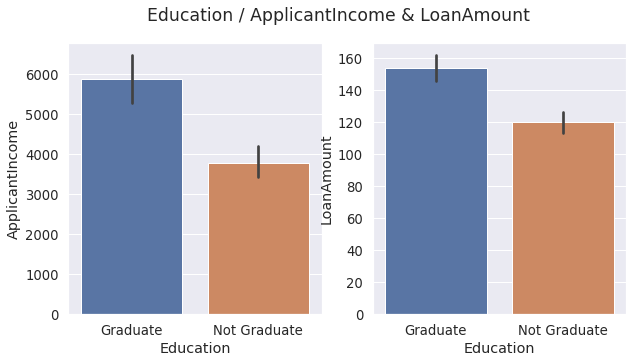

In [194]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5)) 
fig.suptitle('Education / ApplicantIncome & LoanAmount') 
sns.barplot(ax=axes[0], data=df_copy, x='Education', y='ApplicantIncome')
sns.barplot(ax=axes[1], data=df_copy, x='Education', y='LoanAmount');

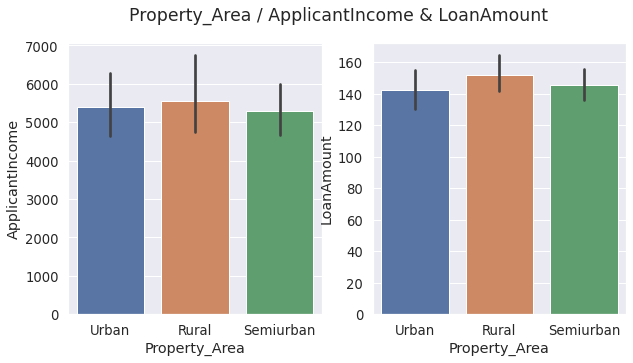

In [195]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5)) 
fig.suptitle('Property_Area / ApplicantIncome & LoanAmount') 
sns.barplot(ax=axes[0], data=df_copy, x='Property_Area', y='ApplicantIncome')
sns.barplot(ax=axes[1], data=df_copy, x='Property_Area', y='LoanAmount');

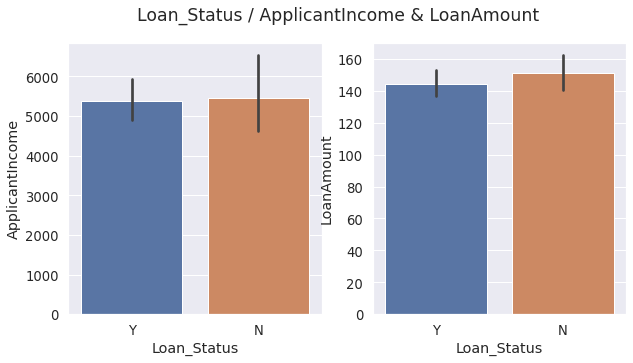

In [196]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5)) 
fig.suptitle('Loan_Status / ApplicantIncome & LoanAmount') 
sns.barplot(ax=axes[0], data=df_copy, x='Loan_Status', y='ApplicantIncome')
sns.barplot(ax=axes[1], data=df_copy, x='Loan_Status', y='LoanAmount');

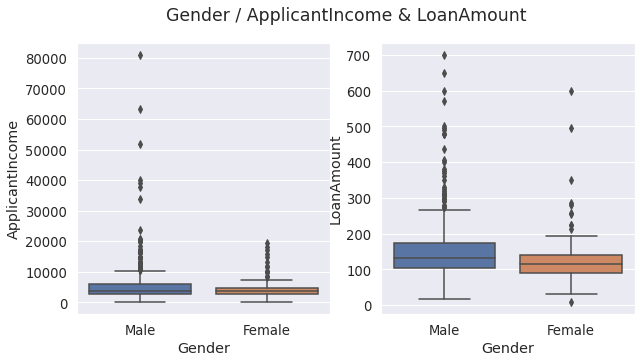

In [197]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5)) 
fig.suptitle('Gender / ApplicantIncome & LoanAmount') 
sns.boxplot(ax=axes[0], data=df_copy, x='Gender', y='ApplicantIncome')
sns.boxplot(ax=axes[1], data=df_copy, x='Gender', y='LoanAmount');

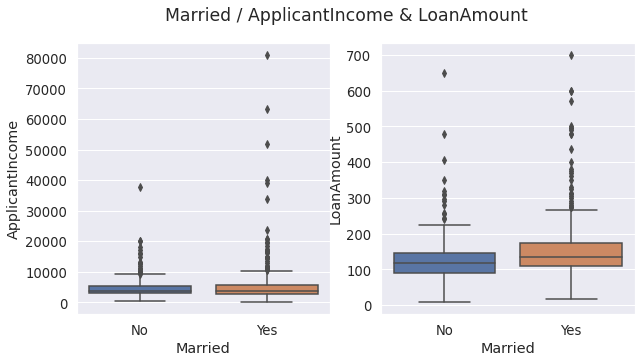

In [198]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5)) 
fig.suptitle('Married / ApplicantIncome & LoanAmount') 
sns.boxplot(ax=axes[0], data=df_copy, x='Married', y='ApplicantIncome')
sns.boxplot(ax=axes[1], data=df_copy, x='Married', y='LoanAmount');

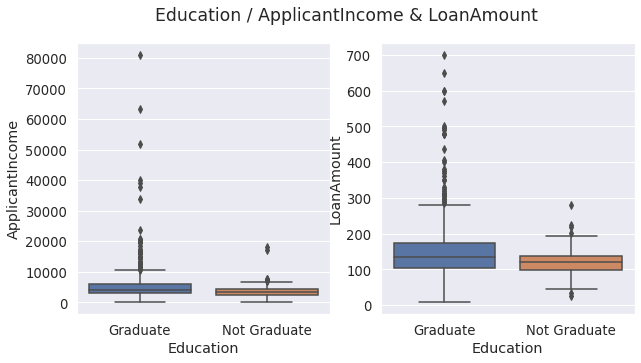

In [199]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5)) 
fig.suptitle('Education / ApplicantIncome & LoanAmount') 
sns.boxplot(ax=axes[0], data=df_copy, x='Education', y='ApplicantIncome')
sns.boxplot(ax=axes[1], data=df_copy, x='Education', y='LoanAmount');

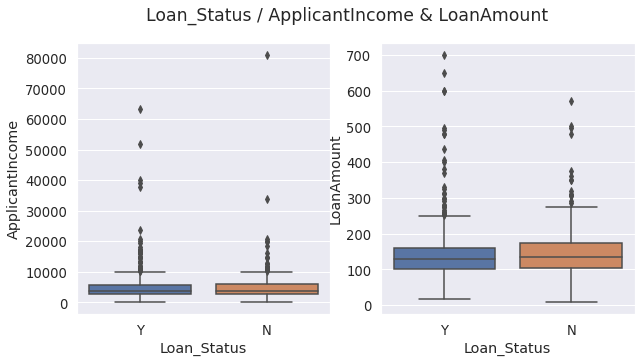

In [200]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5)) 
fig.suptitle('Loan_Status / ApplicantIncome & LoanAmount') 
sns.boxplot(ax=axes[0], data=df_copy, x='Loan_Status', y='ApplicantIncome')
sns.boxplot(ax=axes[1], data=df_copy, x='Loan_Status', y='LoanAmount');

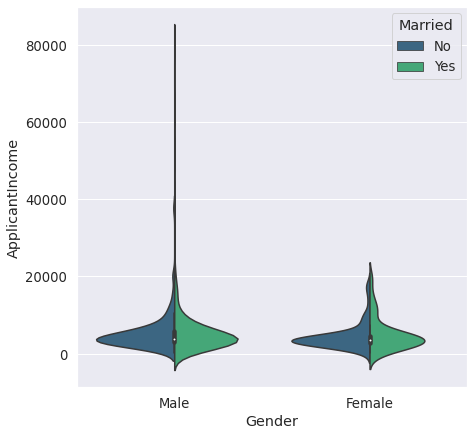

In [201]:
sns.violinplot(x="Gender", y="ApplicantIncome", data=df_copy, hue='Married',split=True, palette='viridis');

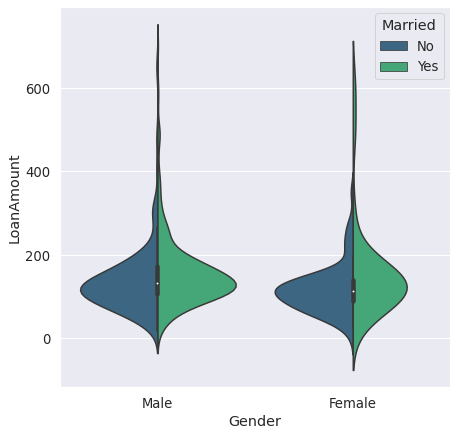

In [202]:
sns.violinplot(x="Gender", y="LoanAmount", data=df_copy, hue='Married',split=True, palette='viridis');

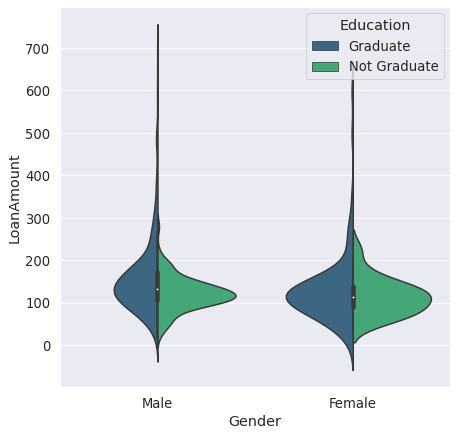

In [203]:
sns.violinplot(x="Gender", y="LoanAmount", data=df_copy, hue='Education',split=True, palette='viridis');

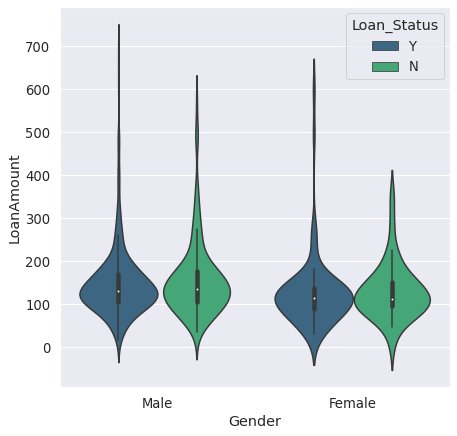

In [204]:
sns.violinplot(x="Gender", y="LoanAmount", data=df_copy, hue='Loan_Status',palette='viridis');

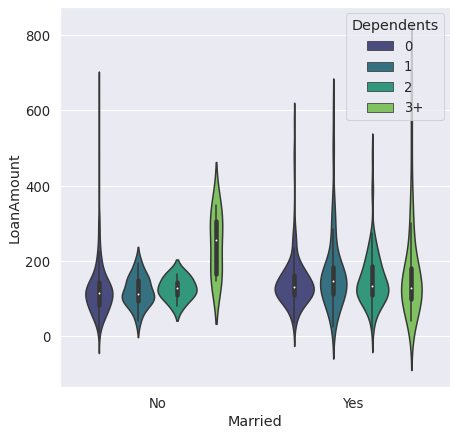

In [205]:
sns.violinplot(x="Married", y="LoanAmount", data=df_copy, hue='Dependents',palette='viridis');

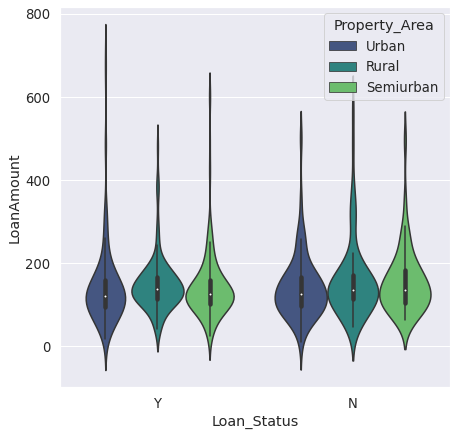

In [206]:
sns.violinplot(x="Loan_Status", y="LoanAmount", data=df_copy, hue='Property_Area', palette='viridis');

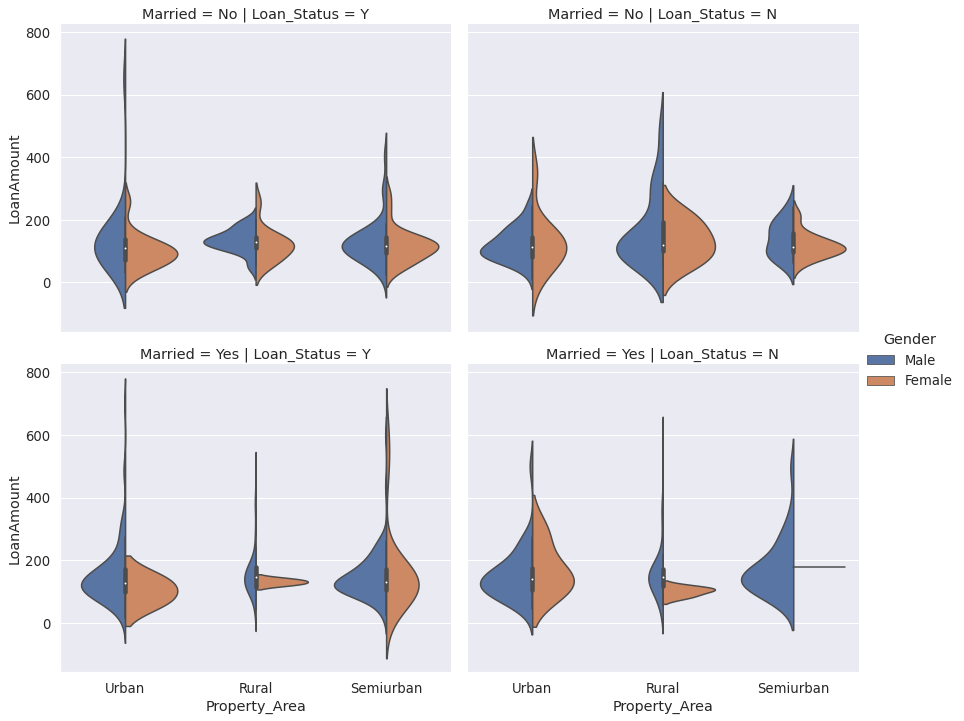

In [207]:
sns.catplot(x="Property_Area", y="LoanAmount", data=df_copy, height=5, aspect=1.2,
            hue="Gender", kind="violin", split=True, col="Loan_Status", row="Married");